# Ejercicio 1:

Nombre: Cristopher Herrera Segovia
Fecha: 08/09/2021

## Instrucciones:

1) Importar la libreria csv y matplotlib.pyplot de python para poder procesar y graficar los datos del archivo.    Debe separar    el código en las casillas que estime conveniente, pero se solicita minimo que en una casilla esten solo las                    importaciones, en otra solo la lectura de los datos y otra con los plots, además cada casilla debe tener una casilla previa    que describa el código en formato markdown.

2) Hacer los gráficos correspondientes al conjunto de datos seleccionado.

3) Realizar un grafico de transacciones bip por comuna y otro grafico de transacciones bip por año.

In [4]:
##Importamos las librerias que se van a ocupar en la tarea
import csv 
import numpy as np
import matplotlib.pyplot as plt

##Creamos estructuras para luego introducir los datos formato csv para cada uno de ellos y seleccionamos las columnas de datos con las que nos interesan trabajar para realizar el grafico.

In [47]:
##Creamos sus estructuras para luego introducir los datos recibidos para cada uno de ellos en formato csv
data={}
data1={}
##Tabla de datos numero 1 con un if borramos las comunas llamadas '-'
with open('data/BIPComuna_std.csv') as archivo_csv:
    lector = csv.reader(archivo_csv, delimiter=',')
    contador=0;
    for i in lector:
        if contador==0:
            contador=1;
        else:
            if i[0]!='-':
                try:
                    data[i[3]]['Comuna']=data[i[3]]['Comuna']+" "+i[0]+" "
                    data[i[3]]['Transacciones']=data[i[3]]['Transacciones']+float(i[2])
                except KeyError:
                        data[i[3]]={'Comuna':"", 'Transacciones': 0}
                        data[i[3]]['Comuna']=i[0]
                        data[i[3]]['Transacciones']=float(i[2])
    
            
       

##Tabla de datos numero 2
with open('data/BIPTotal_std.csv') as archivo_csv:
    lector1=csv.reader(archivo_csv)
    cont=0;
    for i in lector1:
        if cont==0:
            cont=1;
        else:
            try:
                data1[i[1]]['Fecha']=data1[i[1]]['Fecha']+i[0]
                data1[i[1]]['Transacciones']=data1[i[1]]['Transacciones']+int(i[1])
            except KeyError:
                    data1[i[1]]={'Fecha':0, 'Transacciones': 0}
                    data1[i[1]]['Fecha']=i[0]
                    data1[i[1]]['Transacciones']=int(i[1])

##Imprimimos los primeros datos

In [48]:
data

{'2020-03-01': {'Comuna': 'Cerrillos Cerro Navia  ConchalÃ\xad  El Bosque  EstaciÃ³n Central  Huechuraba  Independencia  La Cisterna  La Florida  La Granja  La Pintana  La Reina  Las Condes  Lo Barnechea  Lo Espejo  Lo Prado  Macul  MaipÃº  Ã‘uÃ±oa  Pedro Aguirre Cerda  PeÃ±alolÃ©n  Providencia  Pudahuel  Puente Alto  Quilicura  Quinta Normal  Recoleta  Renca  San Bernardo  San JoaquÃ\xadn  San Miguel  San RamÃ³n  Santiago  Vitacura ',
  'Transacciones': 1324065.0},
 '2020-03-02': {'Comuna': 'Cerrillos Cerro Navia  ConchalÃ\xad  El Bosque  EstaciÃ³n Central  Huechuraba  Independencia  La Cisterna  La Florida  La Granja  La Pintana  La Reina  Las Condes  Lo Barnechea  Lo Espejo  Lo Prado  Macul  MaipÃº  Ã‘uÃ±oa  Pedro Aguirre Cerda  PeÃ±alolÃ©n  Providencia  Pudahuel  Puente Alto  Quilicura  Quinta Normal  Recoleta  Renca  San Bernardo  San JoaquÃ\xadn  San Miguel  San RamÃ³n  Santiago  Vitacura ',
  'Transacciones': 4190847.0},
 '2020-03-03': {'Comuna': 'Cerrillos Cerro Navia  ConchalÃ

##Imprimimos la lista de datos de la tabla 2 para verificar

In [49]:
data1

{'973244': {'Fecha': '2019-01-01', 'Transacciones': 973244},
 '4516314': {'Fecha': '2019-01-02', 'Transacciones': 4516314},
 '4828483': {'Fecha': '2019-01-03', 'Transacciones': 4828483},
 '4928740': {'Fecha': '2019-01-04', 'Transacciones': 4928740},
 '2666538': {'Fecha': '2019-01-05', 'Transacciones': 2666538},
 '1596272': {'Fecha': '2019-01-06', 'Transacciones': 1596272},
 '4936727': {'Fecha': '2019-01-07', 'Transacciones': 4936727},
 '4883400': {'Fecha': '2019-01-08', 'Transacciones': 4883400},
 '4874846': {'Fecha': '2019-01-09', 'Transacciones': 4874846},
 '4860376': {'Fecha': '2019-01-10', 'Transacciones': 4860376},
 '4906180': {'Fecha': '2019-01-11', 'Transacciones': 4906180},
 '2670127': {'Fecha': '2019-01-12', 'Transacciones': 2670127},
 '1599152': {'Fecha': '2019-01-13', 'Transacciones': 1599152},
 '4801457': {'Fecha': '2019-01-14', 'Transacciones': 4801457},
 '4892038': {'Fecha': '2019-01-15', 'Transacciones': 4892038},
 '4886262': {'Fecha': '2019-01-16', 'Transacciones': 4886

##Se configura el tamaño del grafico, en este caso se ingresa la cantidad de transacciones totales de cada comuna en una lista y se separa por comuna , se aplica una rotacion de las ejes X para que se vea mas ordenado y se simplifican las transacciones en 100.000 para poder ver de mejor manera las estadisticas .

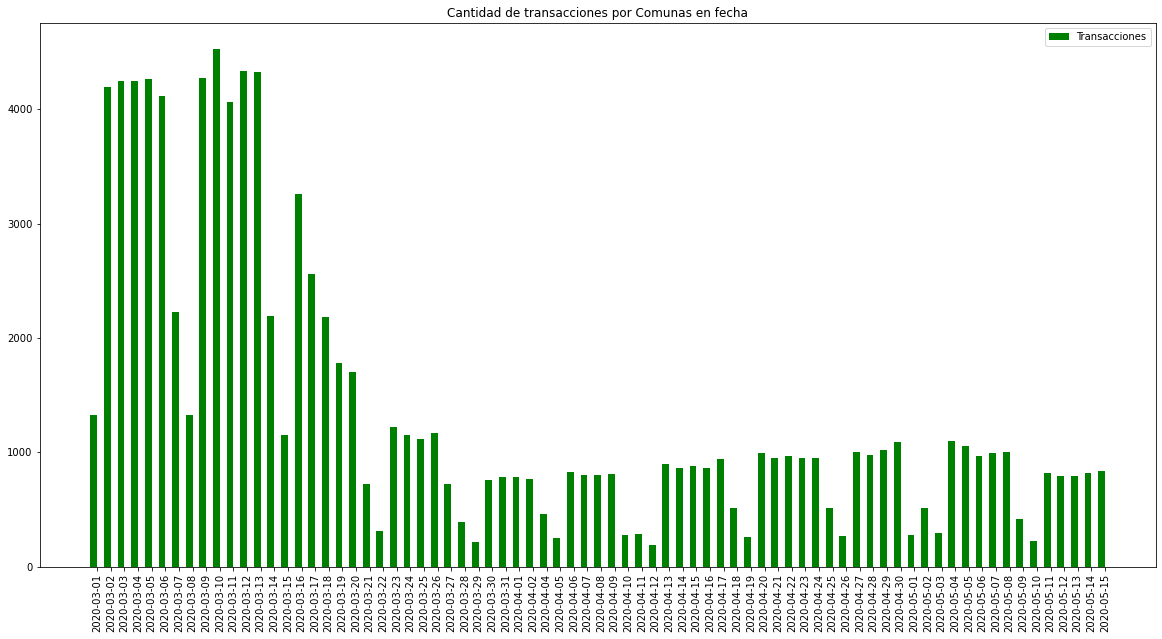

In [59]:
fig,ax=plt.subplots(figsize=(20,10))
etiquetas=list(data.keys())
Transacciones=[]
Comuna=[]

for etiqueta in etiquetas:
    Transacciones.append(data[etiqueta]['Transacciones']/1000)
    Comuna.append(data[etiqueta]['Comuna'])

    
ejeX = np.arange(len(etiquetas))

ancho=0.5


barra1= ax.bar(ejeX - ancho/2 ,Transacciones,ancho,label='Transacciones',color="green")


ax.set_title('Cantidad de transacciones por Comunas en fecha')

ax.set_xticks(ejeX)

ax.set_xticklabels(etiquetas,rotation=90)

ax.legend()

##Se recorre la lista y se va acumulando las transacciones separandolos con un contador por año , luego se imprime el grafico con los datos acumulados en la lista con los valores de los contadores simplificados por 100.000.000 para que el grafico se vea mejor.

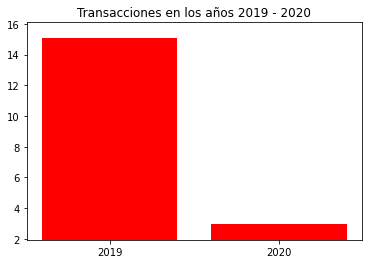

In [51]:
etiquetas1=list(data1.keys())
Transacciones1=[]
Fecha=['2019','2020']
cont1=0
cont2=0
for etiqueta1 in etiquetas1:
      if '2019'in data1[etiqueta1]['Fecha']:
        cont1=data1[etiqueta1]['Transacciones']+cont1
      else:
        cont2=data1[etiqueta1]['Transacciones']+cont2
Transacciones1=[cont1/100000000,cont2/100000000]            
plt.bar(range(2),Transacciones1,color="Red")
plt.xticks(range(2),Fecha)
plt.ylim(min(Transacciones1)-1,max(Transacciones1)+1)
plt.title("Transacciones en los años 2019 - 2020")
plt.show()